### setup

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

### get data

In [2]:
import mnist
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
train_images.shape,test_images.shape,train_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,))

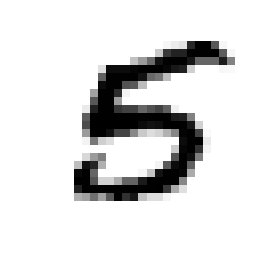

5

In [4]:
a_digit = train_images[20000]
plt.imshow(a_digit, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis("off")
plt.show()
train_labels[20000]

In [5]:
#shuffle the dataset
shuffle_index = np.random.permutation(60000)
X_train, y_train = train_images[shuffle_index], train_labels[shuffle_index]

### Binary classifier

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (test_labels == 5)

#binary classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
x_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))#flatten
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [7]:
sgd_clf.predict(a_digit.reshape(1,-1))

array([ True], dtype=bool)

In [8]:
from sklearn.cross_validation import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9605 ,  0.95595,  0.95375])

In [9]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [10]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")
#even dumb estimator has accuracy above 90%, due to skewed data

array([ 0.909  ,  0.90745,  0.9125 ])

In [11]:
#confusion matrix needs prediction
from sklearn.cross_validation import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52972,  1607],
       [  989,  4432]])

### Exercises
### 1.

In [3]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

shuffle_index = np.random.permutation(60000)#shuffle data
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier(n_jobs=-1)
k_range = list(range(1, 11))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

grid = GridSearchCV(knn_clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714